<a href="https://colab.research.google.com/github/mistryishan25/Comprehensive-Project-SEM8/blob/master/src/data/1_0_ish_reddit_comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw

     |████████████████████████████████| 176 kB 5.3 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 


In [ ]:
import pandas as pd
import os
import seaborn as sns
import time
import praw

In [ ]:
#Create function for extracting comments from submission


In [ ]:
# Reddit credentials 
reddit = praw.Reddit(client_id = 'qhpenVXe2q7xCilAKYZasg', 
                    client_secret = '-iM2pYW8gY2BeIeReVQ6rU0aFHo4Ag',
                    username = 'Affectionate-Bar2857',
                    password = 'qwerty123456',
                    user_agent = 'testing'
                    )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pwd
os.chdir("/content/drive/MyDrive/CP-Sem-8/Datasets/Reddit/")

/content


In [ ]:
! pwd

/content/drive/.shortcut-targets-by-id/1e0qAS7BNSC7KodWw5dcPzwR3-1oc7E43/CP Sem-8/Datasets/Reddit


In [ ]:
ASK_REDDIT_2018 = "/content/drive/MyDrive/CP-Sem-8/Datasets/Reddit/AskReddit/subs_AskReddit_2018.csv"
ASK_REDDIT_2019 = "/content/drive/MyDrive/CP-Sem-8/Datasets/Reddit/AskReddit/subs_AskReddit_2019.csv"
ASK_REDDIT_2020 = "/content/drive/MyDrive/CP-Sem-8/Datasets/Reddit/AskReddit/subs_AskReddit_2020.csv"
ASK_REDDIT_2021 = "/content/drive/MyDrive/CP-Sem-8/Datasets/Reddit/AskReddit/subs_AskReddit_2018.csv"

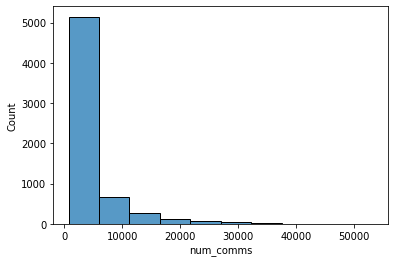

In [ ]:
above_average = df.loc[df["num_comms"]> 1.25*df["num_comms"].mean()]
#print(type(above_average))
sns.histplot(above_average["num_comms"], bins=10)

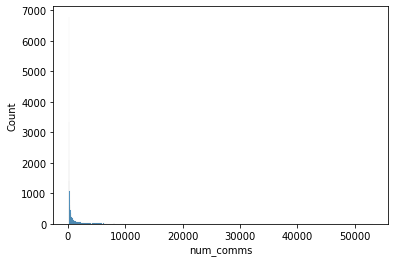

In [ ]:
sns.histplot(df["num_comms"].loc[df["num_comms"]>=100])

In [ ]:
def describe_submissions(file):
  df = pd.read_csv(file)
  print(df.columns)
  df = df.drop("text", axis=1)
  print(f"Maximum of num_comms : {df.max()}")
  print(f"NAN values: {df.isnull().sum()}")
  return df["post_id"][0]

In [ ]:
x = describe_submissions(ASK_REDDIT_2018)

Index(['post_id', 'title', 'author', 'score', 'publish_date', 'num_comms',
       'text'],
      dtype='object')
Maximum of num_comms : post_id                                                    ab9rji
title           “Adults” of reddit, what product/activity did ...
author                                                   zzzzloud
score                                                      152450
publish_date                                  2018-12-31 18:28:57
num_comms                                                   53201
dtype: object
NAN values: post_id         0
title           0
author          0
score           0
publish_date    0
num_comms       0
dtype: int64


In [ ]:
extract_comments(x)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



An inanimate carbon rod, "in rod we trust."
I'm looking forward to watching the debates between Kanye and Trump.
TBH, probably Trump. He was able to win in 2016 against all odds, and unless the Democrats can get their shit together and find a competent person to run against him, then he will probably win again. 
Terry Crews
In my opinion, Americans (along with the rest of the western world) are getting sick of the "populist" and "anti-establishment" candidates. Brexit is shaping up to be an utter disaster, Trump is an utter disaster, and abandoning the "status quo" just makes things worse.




A "boring" Democratic candidate (someone like John Delaney) will probably win. 
It'll be Trump. 

He'll still get the Republican nomination because 1. He'll still pass things like the tax bill that'll win over Republicans and 2. The Republicans aren't going to waste one of their prized candidates on running against him. Also he's the incumbent so it'll be incredibly unlikely that he'll lose the R

In [ ]:
submission = reddit.submission(id=x)
print(submission.title)
print(submission.url)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Who do you honestly think will be elected US President in 2020 and why?
https://www.reddit.com/r/AskReddit/comments/7na3gg/who_do_you_honestly_think_will_be_elected_us/


b'{"message": "Too Many Requests", "error": 429}'

In [ ]:
sub = reddit.submission(x)
text = []
sub.comments.replace_more(limit=None)
comment_queue = sub.comments[:]  # Seed with top-level
while comment_queue:
    comment = comment_queue.pop(0)
    #print(comment.body)
    text.append(comment.body)
    comment_queue.extend(comment.replies)

len(text)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



77

In [ ]:
with open("test.txt", "w+") as f:
    for index,item in enumerate(text):
      f.write(str(index)+" " + item + "\n")

In [ ]:
! cat test.txt

0 An inanimate carbon rod, "in rod we trust."
1 I'm looking forward to watching the debates between Kanye and Trump.
2 TBH, probably Trump. He was able to win in 2016 against all odds, and unless the Democrats can get their shit together and find a competent person to run against him, then he will probably win again. 
3 Terry Crews
4 In my opinion, Americans (along with the rest of the western world) are getting sick of the "populist" and "anti-establishment" candidates. Brexit is shaping up to be an utter disaster, Trump is an utter disaster, and abandoning the "status quo" just makes things worse.




A "boring" Democratic candidate (someone like John Delaney) will probably win. 
5 It'll be Trump. 

He'll still get the Republican nomination because 1. He'll still pass things like the tax bill that'll win over Republicans and 2. The Republicans aren't going to waste one of their prized candidates on running against him. Also he's the incumbent so it'll be incredibly unlikely that he'l

In [ ]:
! where test.txt 

/bin/bash: where: command not found
